In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py, copy
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

## choose file either with the run number (first cell) or widget (second cell)

In [ ]:
pgroup='p20537'
runnumber = 157
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
jsonfile

In [2]:
fc = FileChooser('/sf/alvra/data/p19634/raw/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p19634/raw', filename='', title='HTML(value='', layout=Layout(display='none')…

In [3]:
jsonfile = copy.copy(fc.selected)
jsonfile

'/gpfs/photonics/swissfel/raw/alvra/p19634/run0175-FeOx_XANES/meta/scan.json'

In [4]:
quantile_corr = 0.9

detector_XAS = channel_diode_1
detector_Izero = channel_Izero122

#######################################################################################################33
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

(DataFluo, Izero, correlation, Energy_eV) = \
XAS_scan_1diode_static(scan, detector_XAS, detector_Izero, quantile_corr)

Processing: run0175-FeOx_XANES
Step 141 of 141: Processing acq0141

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet   501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  500 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 500 / 501 -> 0% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
(450,) shots out of (500,) survived
Step 141 of 141: Processed acq0141
correlation Diode (all shots) = 0.9890373688966491


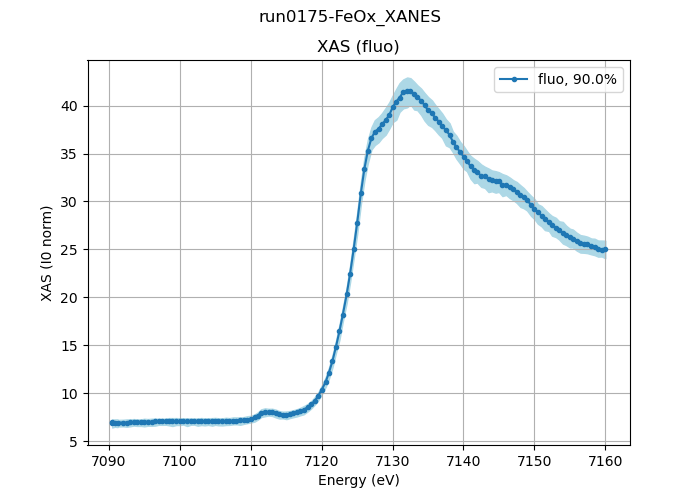

In [6]:
plt.figure(figsize = (7,5))
plt.suptitle(jsonfile.split('/')[-3], fontsize = 12)

XAS = DataFluo[:,0]
err_low = DataFluo[:,1]
err_high = DataFluo[:,2]

plt.plot(Energy_eV, XAS, label='{}, {}%'.format('fluo', quantile_corr*100),marker='.')
plt.fill_between(Energy_eV, err_low, err_high, color='lightblue')

plt.xlabel("Energy (eV)")
plt.ylabel ("XAS (I0 norm)")
plt.gca().set_title('XAS (fluo)')
plt.legend(loc="best")
plt.grid()

plt.show()

#plt.savefig(savedir+'/XANES_RhAcac.png')

## Check correlation for a certain energy point

In [8]:
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
Energy_eV = scan.readbacks

chosen_energy = 7130

detector_XAS = channel_diode_1
detector_Izero = channel_Izero122

quantile_corr = 0.8
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo, Izero, Fluo_filter, Izero_filter) = \
Get_correlation_from_scan_static(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

print ('Energy = {} eV'.format(Energy_eV[index_energy]))

(399,) shots out of (501,) survived
Energy = 7130.021022332693 eV


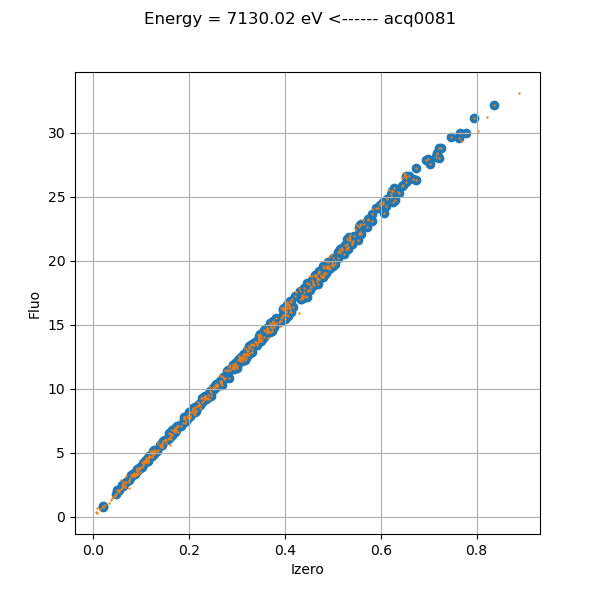

In [9]:
plt.figure(figsize=(6,6))
plt.suptitle('Energy = {:.2f} eV <------ {}'.format(Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))
plt.scatter(Izero_filter, Fluo_filter)
plt.scatter(Izero, Fluo, s = 0.5)
plt.xlabel('Izero')
plt.ylabel('Fluo')
plt.grid()
plt.show()